In [2]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    message: str

In [12]:
def greeting_message(state:AgentState) -> AgentState:
    """ Simple Node to add a greeting message to the state """
    state['message'] = "Hey! "+state['message']+" How can I assist you today?"
    return state

def compliment_message(state:AgentState) -> AgentState:
    """ Simple Node to add a compliment message to the state """
    state['message'] = "You are doing great! "+state['message']
    return state

In [15]:
graph = StateGraph(AgentState)

graph.add_node("greeter",greeting_message)
graph.add_node("complimenter", compliment_message)
graph.add_edge("greeter", "complimenter")
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

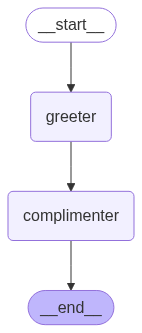

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"message":"Bob"})

In [18]:
result['message']

'You are doing great! Hey! Bob How can I assist you today?'